In [35]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns

from ff_energy.uncertainty.uncertainty_quantifier import UncertaintyQuantifier

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

csv = "/home/boittier/Documents/phd/ff_energy/datasets/silvan/" \
"criegee_mp2_avtz_gen3_randomselection_4305_ens6_all.dat"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
df = pd.read_csv(csv, delimiter="  ")

/tmp/ipykernel_178474/1288098332.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv, delimiter="  ")


In [37]:
df

,Eref,Ens,Model1,Model2,Model3,Model4,Model5,Model6
0,-30.302610,-30.303969,-30.304491,-30.304039,-30.303816,-30.302113,-30.304005,-30.305349
1,-29.555629,-29.556528,-29.553324,-29.556776,-29.560293,-29.550920,-29.560108,-29.557745
2,-28.771974,-28.771562,-28.760334,-28.771938,-28.784126,-28.766819,-28.775587,-28.770569
3,-28.264171,-28.267426,-28.245617,-28.263954,-28.294741,-28.272991,-28.266968,-28.260286
4,-28.074606,-28.091652,-28.057587,-28.087101,-28.126707,-28.107737,-28.098137,-28.072643
...,...,...,...,...,...,...,...,...
33397,-29.668227,-29.669304,-29.667955,-29.669159,-29.670647,-29.668480,-29.672123,-29.667458
33398,-29.431993,-29.432835,-29.433363,-29.432831,-29.431156,-29.433653,-29.436811,-29.429195
33399,-29.002758,-29.006098,-29.007973,-29.004765,-29.003111,-29.010780,-29.007494,-29.002464
33400,-28.620107,-28.628448,-28.628874,-28.625696,-28.629385,-28.635044,-28.623213,-28.628475


/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/boit

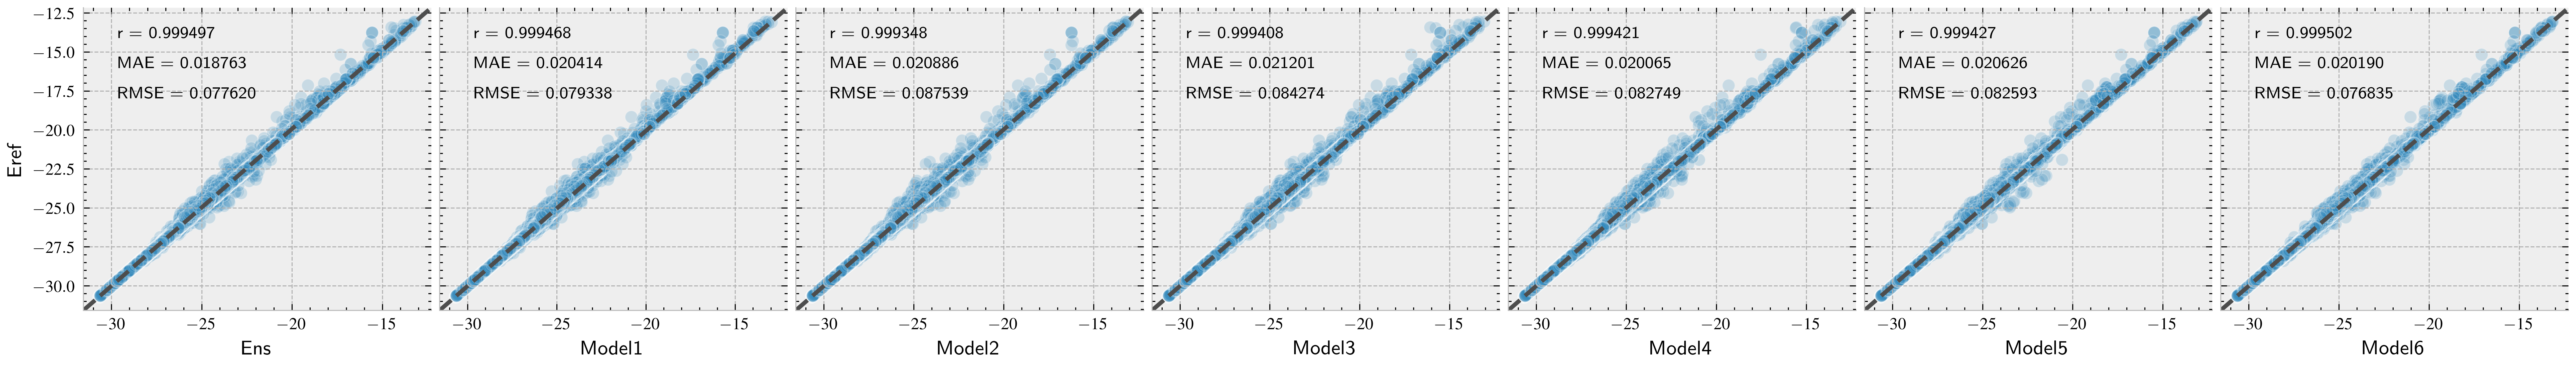

In [38]:
from ff_energy.uncertainty.plotter import corrfunc
    
graph = sns.pairplot(df, x_vars=["Ens", "Model1", "Model2", "Model3", "Model4", "Model5", "Model6", ], 
                     y_vars=["Eref"], palette="husl", plot_kws={"alpha": 0.2});
graph.map(corrfunc)

In [ ]:
uq_ = UncertaintyQuantifier(df)

warmup:   5%|█████▉                                                                                                                  | 98/2000 [00:29<07:54,  4.01it/s, 511 steps of size 8.72e-04. acc. prob=0.85]

In [ ]:
uq_.conformal_uncertainty

In [ ]:
uq_.output_dict